In [17]:
import geopandas as gpd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [9]:
sql = '''
SELECT 
label_full AS name,
longitude,
latitude,
Shape.STAsBinary() AS geom
FROM dbo.Facility
WHERE type_full = 'LTD Transit Sta';
'''

In [10]:
stations = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geom')

In [13]:
stations.crs = "EPSG:2914"

In [14]:
stations = stations.to_crs(epsg=3857)

In [15]:
outpath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\RTP'

In [16]:
stations.to_file(os.path.join(outpath, "stations.shp"))

In [18]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

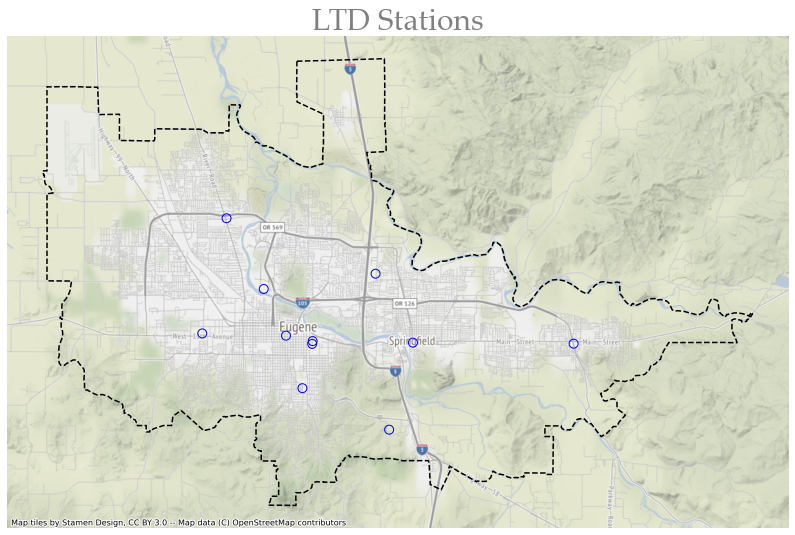

In [20]:
fig, ax = plt.subplots(figsize=(14, 12))
stations.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=80, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("LTD Stations", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [21]:
transit = gpd.read_file(r'T:\MPO\RTP\FY16 2040 Update\Data\RTP_2040_Data.gdb', layer='FiscallyConstrained_TransitProjects')

In [22]:
transit.head()

,Name,SHAPE_Length,geometry
0,Coburg Road,35836.810663,"MULTILINESTRING ((4240112.336 880346.378, 4240..."
1,LCC (Eug Station to 30th Ave),33033.622018,"MULTILINESTRING ((4254043.250 864240.449, 4253..."
2,MLK,19213.945476,"MULTILINESTRING ((4239554.728 878353.994, 4240..."
3,Centennial,24634.677854,"MULTILINESTRING ((4250952.641 880953.992, 4250..."
4,Hwy 99,42950.821366,"MULTILINESTRING ((4238443.169 878389.220, 4238..."


In [106]:
transit=transit.rename(columns={'Name':'name', 'SHAPE_Length':'shplength'})

In [23]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\GISData\Updated'

In [107]:
transit.to_file(os.path.join(path, 'Constrained_Transit.shp'))

In [51]:
bikeped = gpd.read_file(os.path.join(path, 'Constrained_BikePed.shp'))

In [63]:
bikeped_pt = gpd.read_file(os.path.join(path, 'Constrained_BikePed_points.shp'))

In [25]:
roadway = gpd.read_file(os.path.join(path, 'Constrained_Roadway_lines.shp'))

In [64]:
roadway_pt = gpd.read_file(os.path.join(path, 'Constrained_Roadway_points.shp'))

In [52]:
bikeped['buffered'] = bikeped.buffer(100)

In [65]:
bikeped_pt['buffered'] = bikeped_pt.buffer(100)

In [58]:
roadway['buffered'] = roadway.buffer(100)

In [66]:
roadway_pt['buffered'] = roadway_pt.buffer(100)

In [53]:
bikeped = bikeped.set_geometry('buffered')

In [67]:
bikeped_pt = bikeped_pt.set_geometry('buffered')

In [59]:
roadway = roadway.set_geometry('buffered')

In [68]:
roadway_pt = roadway_pt.set_geometry('buffered')

In [54]:
bikeped = bikeped.to_crs(epsg=3857)

In [69]:
bikeped_pt = bikeped_pt.to_crs(epsg=3857)

In [60]:
roadway = roadway.to_crs(epsg=3857)

In [70]:
roadway_pt = roadway_pt.to_crs(epsg=3857)

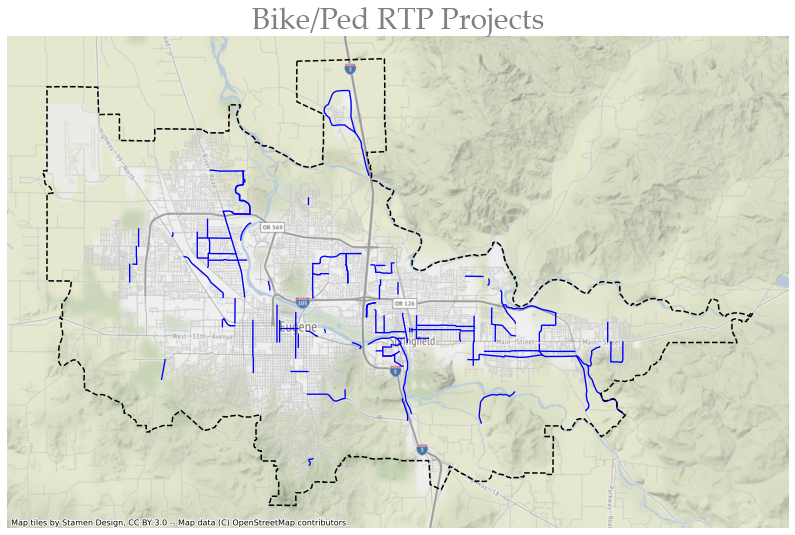

In [57]:
fig, ax = plt.subplots(figsize=(14, 12))
bikeped.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike/Ped RTP Projects", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

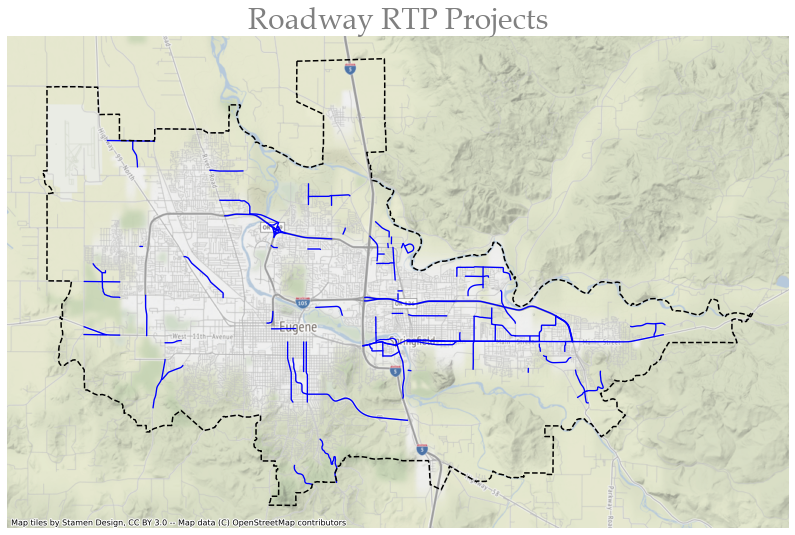

In [76]:
fig, ax = plt.subplots(figsize=(14, 12))
roadway.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Roadway RTP Projects", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [109]:
transit = transit.to_crs(epsg=3857)

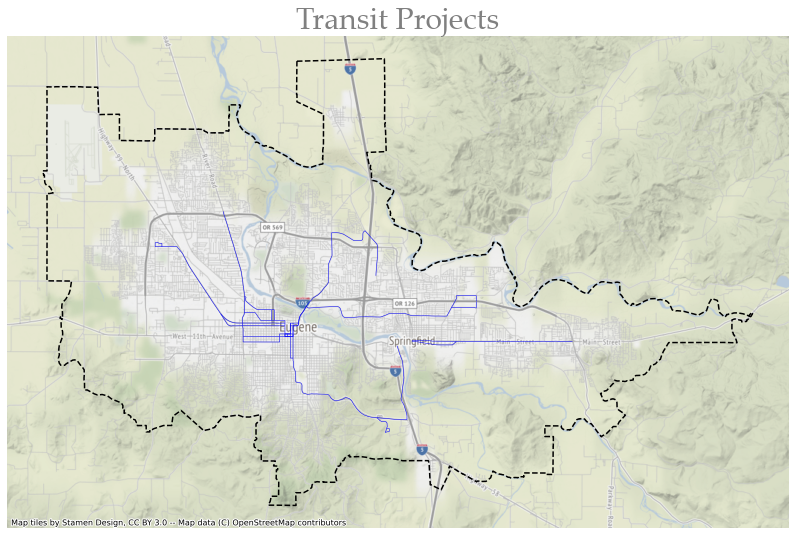

In [110]:
fig, ax = plt.subplots(figsize=(14, 12))
transit.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Transit Projects", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [111]:
transit.head()

,name,shplength,geometry
0,Coburg Road,35836.810663,"MULTILINESTRING ((-13702449.119 5473682.270, -..."
1,LCC (Eug Station to 30th Ave),33033.622018,"MULTILINESTRING ((-13696346.838 5467025.855, -..."
2,MLK,19213.945476,"MULTILINESTRING ((-13702658.986 5472828.851, -..."
3,Centennial,24634.677854,"MULTILINESTRING ((-13697869.188 5474081.677, -..."
4,Hwy 99,42950.821366,"MULTILINESTRING ((-13703129.824 5472829.178, -..."


In [78]:
datapath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\Historic'

In [79]:
historic_sites = gpd.read_file(os.path.join(datapath, 'NationalRegisterHistoricSitesCLMPO.shp'))

In [92]:
joined = gpd.tools.sjoin(roadway, historic_sites, how="inner")

In [93]:
joined.shape

(8, 20)

In [97]:
joined_s = joined.drop_duplicates(subset=['RTP_ID', 'geometry'])

In [98]:
joined_s

,RTP_ID,Category,Narration,RoughCost,YearRange,GeoLimits,JurisProjN,Length,Name,PrimJurisd,CostMax,CostMin,geometry,buffered,index_right,id,name,address,city,yrbuilt
12,210,Study,Evaluate north/south circulation options on th...,100000,None,Downtown to South Eugene,ETSP S-3,5.49,Oak/Pearl and Hilyard/Patterson,Eugene,None,None,"MULTILINESTRING ((4242326.466 869684.758, 4242...","MULTIPOLYGON (((-13702239.249 5471384.606, -13...",81,2641,"Dorris, Benjamin Franklin, House",707 E 17Th Ave,Eugene,c. 1900
19,809,Urban Standards,Change Aspen Street to a two-lane cross-sectio...,2800000,2030-2034,Centennial Boulevard to West D Street,"STSP-US-3, LCTSP-11",0.44,Aspen Street,"Lane County, Springfield",None,None,"LINESTRING (4252895.573 880869.322, 4252902.57...","POLYGON ((-13696999.853 5474044.581, -13696999...",130,20170,"Campbell, Robert E, House",890 Aspen Dr,Springfield,1870
23,838,Study,Access management plan,150000,2020-2024,I-5 to UGB,None,6,Main Street/Highway 126,"Springfield, ODOT",None,None,"LINESTRING (4250811.985 876642.895, 4250988.16...","POLYGON ((-13697805.974 5472303.594, -13697729...",131,20494,Oregon Power Company Springfield Substation,590 Main St,Springfield,1911
61,823,Study,Study a new crossing of OR 126 between 5th Str...,200000,2035-2040,5th Street to 15th Street,S-4,0.79,Main Street (OR126B),"Springfield, ODOT",None,None,"MULTILINESTRING ((4262122.085 877005.878, 4262...","POLYGON ((-13694336.095 5472633.703, -13694335...",131,20494,Oregon Power Company Springfield Substation,590 Main St,Springfield,1911
64,824,Study,Study improvements,150000,2020-2024,Mill Street to 21st Street,S-10,2.98,Main Street/South A Street,Springfield,None,None,"MULTILINESTRING ((4265055.460 876903.628, 4265...","POLYGON ((-13695066.044 5472557.149, -13695067...",131,20494,Oregon Power Company Springfield Substation,590 Main St,Springfield,1911
86,411,Transit Oriented Development Implementation,Convert 8th Avenue to a two-way street with pr...,3200000,2020-2024,High Street to Jefferson Street,None,None,8th Avenue,Eugene,None,None,"LINESTRING (4237275.593 879591.155, 4237677.78...","POLYGON ((-13703469.346 5473366.529, -13703299...",68,2056,Mcmorran & Washburne Dept Store,795 Willamette St,Eugene,1902


In [112]:
df = joined_s[['Category', 'geometry']].groupby(['Category']).agg('count')

In [114]:
df

,geometry
Category,
Study,4
Transit Oriented Development Implementation,1
Urban Standards,1
